<a href="https://colab.research.google.com/github/rks12/ML/blob/main/Spamclass_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install contractions
!pip install stopwords
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

     |████████████████████████████████| 327kB 3.1MB/s 
     |████████████████████████████████| 286kB 17.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85404 sha256=c2be239733c8892ae59a7bf7e8292422c8ce253465510d94de10f33db1487cee
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import contractions
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [3]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [4]:
df = pd.read_csv('spam.csv', encoding='latin1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
#df.head(5)
df = df.rename(columns={"v1": "label","v2": "message"})
print(df.head(5))
df = df.dropna() 

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
print(df.isnull().sum())
print(df)

label      0
message    0
dtype: int64
     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


ham count: 4825
spam count: 747


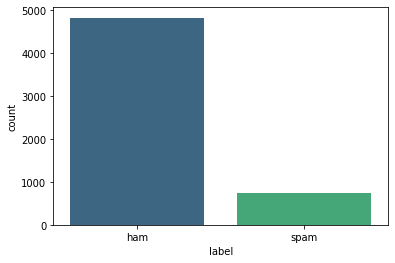

In [6]:
df.loc[df['label']=='spam', 'code']=0
hamcount=df.label.count()-df.code.count()
spamcount=df.code.count()
print("ham count:",hamcount)
print("spam count:",spamcount)
df = df.drop(['code'], axis=1)
_=sns.countplot(data=df,x='label',palette='viridis')


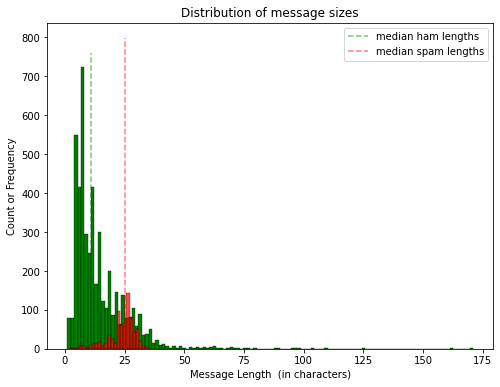

In [7]:
df['wordcount'] = df['message'].str.split().str.len()
fig,ax=plt.subplots(figsize=(8,6))
check = 'ham'
sns.histplot(df[df['label']==check],x='wordcount',color='green',ax=ax,alpha=1)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(x=df.loc[df['label']==check,'wordcount'].median(),ymin=ymin,ymax=ymax,color='green',alpha=0.5,linestyles='dashed')

check = 'spam'
sns.histplot(df[df['label']==check],x='wordcount',color='red',ax=ax,alpha=0.7)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(x=df.loc[df['label']==check,'wordcount'].median(),ymin=ymin,ymax=ymax,color='red',alpha=0.5,linestyles='dashed')
plt.legend(['median ham lengths','median spam lengths'])
_=plt.title('Distribution of message sizes')
_=plt.ylabel('Count or Frequency')
_=plt.xlabel('Message Length  (in characters)')

In [8]:
lem = WordNetLemmatizer()
def preprocessing(data):
    sms = contractions.fix(data)
    sms = sms.lower()
    sms = re.sub(r'https?://S+|www.S+', "", sms).strip()
    sms = re.sub(r"[^a-z ]", "", sms)
    sms=re.sub(' +', ' ',sms)
    sms = sms.split() 
    sms = [lem.lemmatize(word) for word in sms if not word in set(stopwords.words("english"))]
    sms = " ".join(sms)
    return sms
df["message"] = df["message"].apply(preprocessing)
#df["message"] = df["message"].str.split()
#df["message"] = " ".join(df["message"])
df['New_wordcount'] = df['message'].str.split().str.len()
#df['label'] = df['message'].map({'spam': 1, 'ham': 0})


In [9]:
df = df.astype(str)
df['label'].value_counts()
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']
ham = ham.sample(spam.shape[0])
print(ham.shape, spam.shape)
data = ham.append(spam, ignore_index=True)
data.label.value_counts()


(747, 4) (747, 4)


ham     747
spam    747
Name: label, dtype: int64

In [10]:
print(data.isnull().sum())

data['message'] = data['message'].str.split()
data = data.astype(str)
print(data.message)


label            0
message          0
wordcount        0
New_wordcount    0
dtype: int64
0                                   ['hi', 'roger', 'cl']
1                ['popping', 'ltgt', 'ibuprofen', 'help']
2                                       ['dear', 'reach']
3       ['hi', 'neva', 'worry', 'bout', 'da', 'truth',...
4       ['frnd', 'necesity', 'life', 'imagine', 'ursel...
                              ...                        
1489    ['want', 'explicit', 'sex', 'sec', 'ring', 'co...
1490    ['asked', 'mobile', 'chatlines', 'inclu', 'fre...
1491    ['contract', 'mobile', 'mnths', 'latest', 'mot...
1492    ['reminder', 'get', 'pound', 'free', 'call', '...
1493    ['nd', 'time', 'tried', 'contact', 'pound', 'p...
Name: message, Length: 1494, dtype: object


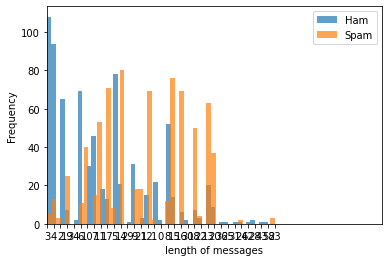

In [11]:
plt.hist(data[data['label']=='ham']['New_wordcount'], bins = 50, alpha = 0.7,label='Ham')
plt.hist(data[data['label']=='spam']['New_wordcount'], bins = 50, alpha = 0.7,label='Spam')
plt.xlabel('length of messages')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,50)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
#df = df.astype(str)
xtrain,xtest,ytrain,ytest=train_test_split(data["message"],data["label"],test_size=.3,random_state=0,shuffle=True,stratify=data["label"])
#xtrain
#xtrain = xtrain.replace(np.nan, '')
#ytrain = ytrain.replace(np.nan, '')
print(xtrain)

1128    ['youve', 'bin', 'awarded', 'play', 'instant',...
742       ['ohas', 'usual', 'vijay', 'film', 'different']
477     ['make', 'time', 'tonight', 'whenever', 'cool'...
542     ['still', 'waitin', 'usual', 'come', 'back', '...
1277    ['ringtone', 'club', 'gr', 'new', 'polys', 'di...
                              ...                        
1211    ['bloomberg', 'message', 'center', 'wait', 'ap...
312     ['get', 'unless', 'guy', 'want', 'come', 'time...
268                         ['make', 'fuck', 'sake', 'x']
272     ['jesus', 'armand', 'really', 'trying', 'tell'...
1222    ['text', 'banneduk', 'see', 'cost', 'p', 'text...
Name: message, Length: 1045, dtype: object


In [14]:
print(xtrain)

1128    ['youve', 'bin', 'awarded', 'play', 'instant',...
742       ['ohas', 'usual', 'vijay', 'film', 'different']
477     ['make', 'time', 'tonight', 'whenever', 'cool'...
542     ['still', 'waitin', 'usual', 'come', 'back', '...
1277    ['ringtone', 'club', 'gr', 'new', 'polys', 'di...
                              ...                        
1211    ['bloomberg', 'message', 'center', 'wait', 'ap...
312     ['get', 'unless', 'guy', 'want', 'come', 'time...
268                         ['make', 'fuck', 'sake', 'x']
272     ['jesus', 'armand', 'really', 'trying', 'tell'...
1222    ['text', 'banneduk', 'see', 'cost', 'p', 'text...
Name: message, Length: 1045, dtype: object


In [15]:
clf= Pipeline([('Tfidf',TfidfVectorizer(lowercase=False)),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)


In [16]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         ham       0.88      0.97      0.93       225
        spam       0.97      0.87      0.92       224

    accuracy                           0.92       449
   macro avg       0.93      0.92      0.92       449
weighted avg       0.93      0.92      0.92       449



In [17]:
#print(ypred)
confusion_matrix(ytest,ypred)

array([[219,   6],
       [ 29, 195]])